In [1]:
import psycopg2

In [2]:
# Database configuration
DB_HOST = 'localhost'
DB_PORT = '5432'
DB_NAME = 'SWARANGI'
DB_USER = 'postgres'
DB_PASSWORD = '19092002'

In [3]:
# Connect to the PostgreSQL database
def connect_db():
    return psycopg2.connect(
        host=DB_HOST,
        port=DB_PORT,
        dbname=DB_NAME,
        user=DB_USER,
        password=DB_PASSWORD
    )

In [4]:
conn = connect_db()
cursor = conn.cursor()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# libraries for computation
import pandas as pd
import numpy as np

#library for train test split
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#library for preprocessing
from sklearn.preprocessing import StandardScaler

#library for Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#Library for feature selection techniques
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

#libraries for various ML models 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor



#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')


In [6]:
def plotConfusion(cm):
    sns.set_style('white')
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
    classNames = ['Genuine','Imposter']
    plt.title('Confusion Matrix',fontsize = 15)
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames,fontsize=12)
    plt.yticks(tick_marks, classNames,fontsize=12)
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [10]:
cursor.execute("SELECT * FROM keystrokes_data;")
records = cursor.fetchall()

# Create a DataFrame from the fetched records
data = pd.DataFrame(records, columns=[desc[0] for desc in cursor.description])

In [11]:
data.head()

,username,h_key1,dd_key1_key2,ud_key1_key2,h_key2,dd_key2_key3,ud_key2_key3,h_key3,dd_key3_key4,ud_key3_key4,...,dd_key5_key6,ud_key5_key6,h_key6,dd_key6_key7,ud_key6_key7,h_key7,dd_key7_key8,ud_key7_key8,h_key8,target
0,Nikhil,0.119,0.272,0.153,0.103,0.208,0.105,0.103,0.288,0.185,...,0.487,0.392,0.216,0.161,-0.055,0.119,0.240,0.121,0.103,Genuine
1,Nikhil,0.119,0.272,0.153,0.103,0.216,0.113,0.103,0.287,0.184,...,0.751,0.608,0.304,0.240,-0.064,0.119,0.225,0.106,0.103,Genuine
2,Nikhil,0.127,0.352,0.225,0.143,0.240,0.097,0.143,0.344,0.201,...,0.614,0.480,0.336,0.265,-0.071,0.135,0.232,0.097,0.143,Genuine
3,Nikhil,0.122,0.315,0.193,0.127,0.200,0.073,0.111,0.400,0.289,...,0.377,0.290,0.206,0.151,-0.055,0.135,0.184,0.049,0.111,Genuine
4,Nikhil,0.143,0.232,0.089,0.119,0.208,0.089,0.127,0.264,0.137,...,0.351,0.264,0.216,0.153,-0.063,0.119,0.160,0.041,0.143,Genuine


In [12]:
data.columns

Index(['username', 'h_key1', 'dd_key1_key2', 'ud_key1_key2', 'h_key2',
       'dd_key2_key3', 'ud_key2_key3', 'h_key3', 'dd_key3_key4',
       'ud_key3_key4', 'h_key4', 'dd_key4_key5', 'ud_key4_key5', 'h_key5',
       'dd_key5_key6', 'ud_key5_key6', 'h_key6', 'dd_key6_key7',
       'ud_key6_key7', 'h_key7', 'dd_key7_key8', 'ud_key7_key8', 'h_key8',
       'target'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   username      1425 non-null   object 
 1   h_key1        1425 non-null   float64
 2   dd_key1_key2  1425 non-null   float64
 3   ud_key1_key2  1425 non-null   float64
 4   h_key2        1425 non-null   float64
 5   dd_key2_key3  1425 non-null   float64
 6   ud_key2_key3  1425 non-null   float64
 7   h_key3        1425 non-null   float64
 8   dd_key3_key4  1425 non-null   float64
 9   ud_key3_key4  1425 non-null   float64
 10  h_key4        1425 non-null   float64
 11  dd_key4_key5  1425 non-null   float64
 12  ud_key4_key5  1425 non-null   float64
 13  h_key5        1425 non-null   float64
 14  dd_key5_key6  1425 non-null   float64
 15  ud_key5_key6  1425 non-null   float64
 16  h_key6        1425 non-null   float64
 17  dd_key6_key7  1425 non-null   float64
 18  ud_key6_key7  1425 non-null 

In [15]:
data['username'].value_counts()

Nikhil      710
Deepti      225
Huy         200
Shridhar     50
Vikram       38
Tarang       33
Vishu        33
Rohan        25
Sushmit      25
Abhishek     24
Tejas C      23
Tejas S      22
Rutvik       14
XYZ           3
Name: username, dtype: int64

In [16]:
data['target'].value_counts()

Imposter    713
Genuine     712
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

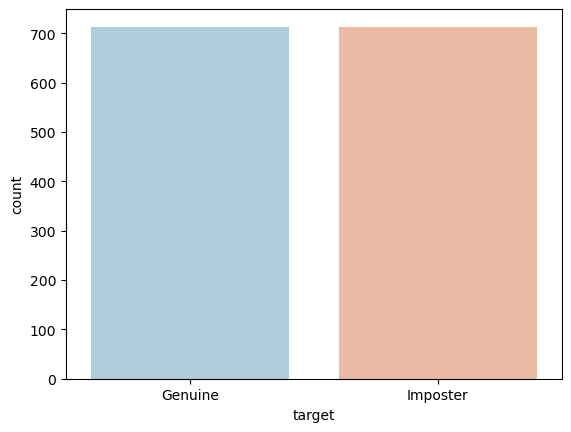

In [17]:
sns.countplot(x='target',data=data,palette='RdBu_r')

In [76]:
features = list(data.columns[1:23])
X = data[features]
y = data['target']
train, test = train_test_split(data, test_size = 0.2)
X_train = train[features]
y_train = train['target']
X_test = test[features]
y_test = test['target']

[[134   4]
 [  8 139]]


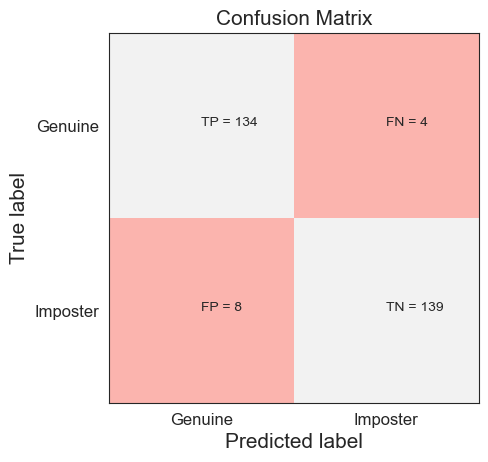

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)
plotConfusion(cm)

[0.9473813830590466, 0.9332594316964121, 0.9508820312378503, 0.9473541649521545, 0.9579051075965775, 0.9473774931165715, 0.9543971986511737, 0.9473774931165715, 0.9543971986511737, 0.9438651785575435, 0.9473813830590466, 0.9368483258772362, 0.943872091576459, 0.9368483258772362, 0.9368483258772362]


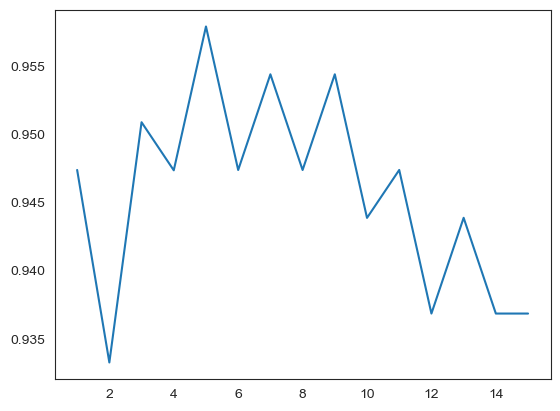

In [20]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
f1_scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(kVals,f1_scores)    
print(f1_scores) 

In [21]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8158797409902271
Accuracy Score:  0.8175438596491228


In [22]:
#DT
d_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
d_classifier.fit(X_train,y_train)
pred = d_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9789473684210527
Accuracy Score:  0.9789473684210527


In [23]:
#Ensemble Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9894747217843156
Accuracy Score:  0.9894736842105263


[0.9754410174967365, 0.9824578696405261, 0.9824578696405261, 0.9859673328388477, 0.9894747217843156, 0.9894747217843156, 0.9894747217843156, 0.9894747217843156]


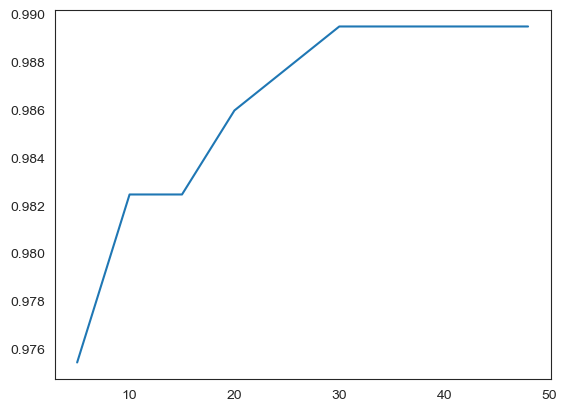

In [24]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,48]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [25]:
#Bagging Classifier with Decision tree as base learner
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=cart, n_estimators=150, random_state=7)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9789473684210527
Accuracy Score:  0.9789473684210527


In [27]:
#ExtraTreeClassifier
num_trees = 80
max_features = 20
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9929824561403509
Accuracy Score:  0.9929824561403509


In [28]:
# AdaBoostClassifier
seed = 7
num_trees = 100
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9929824561403509
Accuracy Score:  0.9929824561403509


In [29]:
seed = 7
num_trees = 100
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9929824561403509
Accuracy Score:  0.9929824561403509


F1 Score:  0.9929824561403509
Accuracy Score:  0.9929824561403509
[[137   1]
 [  1 146]]


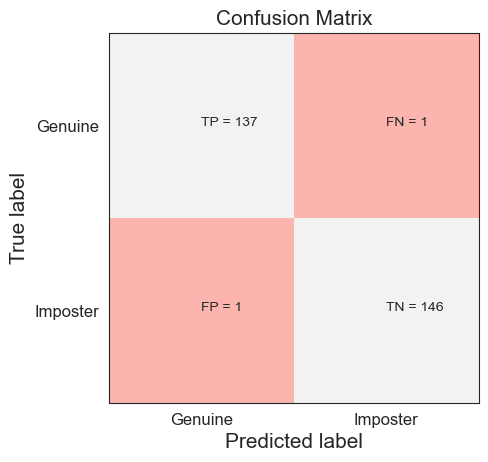

In [31]:
# Try with Different Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
# create the sub models
estimators = []
model1 = KNeighborsClassifier(n_neighbors=5)
estimators.append(('Knn', model1))
model2 = RandomForestClassifier(n_estimators=100, max_features=20)
estimators.append(('RandomForest', model2))
model3 = ExtraTreesClassifier(n_estimators=100, max_features=20)
estimators.append(('ExtraTree', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
pred = ensemble.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))
cm = confusion_matrix(y_test,pred)
print(cm)
plotConfusion(cm)

In [32]:
#MLPClassifier
net = net = MLPClassifier(random_state=2,hidden_layer_sizes=(100,200,330,10),max_iter=500,activation= 'relu', learning_rate= 'invscaling', solver='adam')
net.fit(X_train,y_train)
pred= net.predict(X_test)

print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9824600299107152
Accuracy Score:  0.9824561403508771


In [33]:
pca = PCA(n_components=15)  
X_train_pca = pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test) 

In [34]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca,y_train)
pred = knn.predict(X_test_pca)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9579051075965775
Accuracy Score:  0.9578947368421052


[0.9473813830590466, 0.9332594316964121, 0.9508820312378503, 0.9473541649521545, 0.9579051075965775, 0.9473774931165715, 0.9543971986511737, 0.9473774931165715, 0.9543971986511737, 0.9438651785575435, 0.9473813830590466, 0.9368483258772362, 0.943872091576459, 0.9368483258772362, 0.9368483258772362]


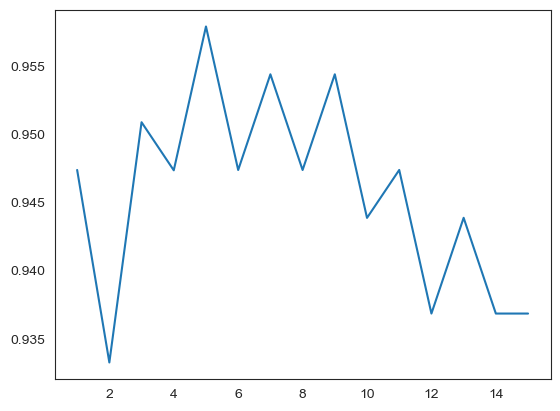

In [35]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
f1_scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca,y_train)
    pred = knn.predict(X_test_pca)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(kVals,f1_scores)    
print(f1_scores) 

In [36]:
#Ensemble Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=150, random_state = 42)
rf_classifier.fit(X_train_pca,y_train)
pred = rf_classifier.predict(X_test_pca)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9719298245614035
Accuracy Score:  0.9719298245614035


In [37]:
#ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, max_features=5)
model.fit(X_train_pca, y_train)
pred = model.predict(X_test_pca)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9684171600032438
Accuracy Score:  0.968421052631579


In [38]:
pca = PCA(n_components=5)  
X_train_pca = pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test) 
#Version 13 imporvement
# Try with Different Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
# create the sub models
estimators = []
model1 = KNeighborsClassifier(n_neighbors=4)
estimators.append(('Knn', model1))
model2 = RandomForestClassifier(n_estimators=100, max_features=5)
estimators.append(('RandomForest', model2))
model3 = ExtraTreesClassifier(n_estimators=100, max_features=5)
estimators.append(('ExtraTree', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train_pca, y_train)
pred = ensemble.predict(X_test_pca)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9438527373293869
Accuracy Score:  0.9438596491228071


In [40]:
svd = TruncatedSVD(n_components=15)
X_train_svd = svd.fit_transform(X_train,y_train)
X_test_svd = svd.transform(X_test)

In [41]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_svd,y_train)
pred = knn.predict(X_test_svd)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9579051075965775
Accuracy Score:  0.9578947368421052


[0.9473813830590466, 0.9332594316964121, 0.9508820312378503, 0.9473541649521545, 0.9579051075965775, 0.9473774931165715, 0.9543971986511737, 0.9473774931165715, 0.9543971986511737, 0.9438651785575435, 0.9473813830590466, 0.9368483258772362, 0.943872091576459, 0.9368483258772362, 0.9368483258772362]


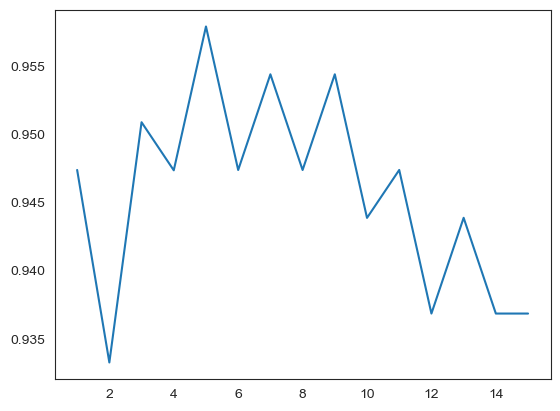

In [42]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
f1_scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_svd,y_train)
    pred = knn.predict(X_test_svd)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(kVals,f1_scores)    
print(f1_scores)

In [43]:
#Ensemble Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=150, random_state = 42)
rf_classifier.fit(X_train_svd,y_train)
pred = rf_classifier.predict(X_test_svd)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9719298245614035
Accuracy Score:  0.9719298245614035


In [45]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=50, max_features=15,random_state=7)
model.fit(X_train_svd, y_train)
pred = model.predict(X_test_svd)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.971922210339421
Accuracy Score:  0.9719298245614035


In [46]:
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=10,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X, y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])

Optimal number of features : 20
Best features : Index(['h_key1', 'dd_key1_key2', 'ud_key1_key2', 'h_key2', 'dd_key2_key3',
       'ud_key2_key3', 'h_key3', 'dd_key3_key4', 'ud_key3_key4', 'h_key4',
       'dd_key4_key5', 'ud_key4_key5', 'dd_key5_key6', 'ud_key5_key6',
       'h_key6', 'dd_key6_key7', 'ud_key6_key7', 'h_key7', 'dd_key7_key8',
       'ud_key7_key8'],
      dtype='object')


In [77]:
st  = "0.119,0.272,0.153,0.103,0.208,0.105,0.103,0.288,0.185,0.151,0.288,0.137,0.095,0.487,0.392,0.216,0.161,-0.055,0.119,0.24,0.121,0.103"
li = list(st.split(','))

In [78]:
ar = np.array(li)
arr = ar.reshape(1,22)

In [79]:

arr.shape

(1, 22)

In [80]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
res = knn.predict(arr)

In [81]:
print("Shape of X_train:", X_train.shape)
print("Shape of arr:", arr.shape)

Shape of X_train: (1140, 22)
Shape of arr: (1, 22)


In [82]:
res[0]

'Genuine'

In [88]:
st1  ="0.08,0.358,0.278,0.076,0.239,0.163,0.072,0.22,0.148,0.068,0.402,0.334,0.068,0.527,0.459,0.22,0.133,-0.087,0.104,0.47,0.366,0.072"
li = list(st1.split(','))

In [89]:
ar = np.array(li)
arr = ar.reshape(1,22)

In [90]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
res = knn.predict(arr)

In [91]:
res[0]

'Imposter'